# Calculamos los redshifts fotometricos 
# Precision
# Datos que utilice para obtenerlo
# Con que datos los comparamos si es correcto o no
# Para eso tenemos el plot de dispersion
# Si esta sobre una linea es excelente correspondencia
# No encontramos una linea
# Maravilloso como una primera aproximacion

# 5. Exercises

## 5.1 Play with the distances and densities

### 1. Using Python, write a program to plot the Hubble function depending on the redshift (up to z=1) for the values $\Omega_m = 0.3$, $\Omega_\lambda = 0.7$, $\Omega_R = 0 $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Defining our three omegas
omega_mass = 0.3 
omega_lambda= 0.7
omega_radiation = 0

lightspeed_kms = 299792                        # Lightspeed (km/s)
hubble_0 = 70                                  # Hubble parameter for z=0 (km/s/Mpc)

#z = np.random.rand(100)
#z = np.arange(0,1,0.01)
z = np.arange(0,3.01,0.01)

In [3]:
def hubble_function(z):
    return hubble_0 * np.sqrt( omega_mass*(1+z)**3 + omega_radiation*(1+z)**4 + omega_lambda)

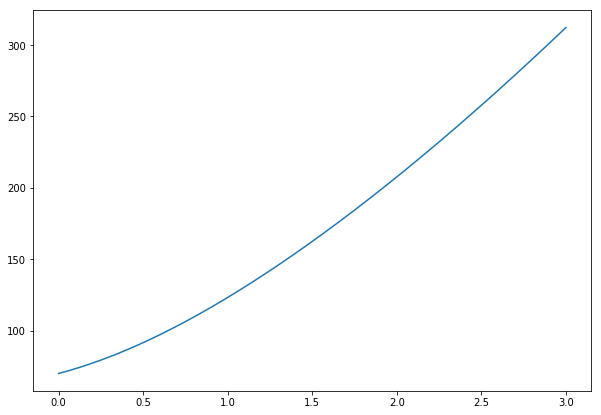

In [4]:
plt.figure(figsize = (10,7))
plt.plot(z,hubble_function(z))
plt.show()

### 2. Using this result, calculate the comoving distance $\chi(z)$, the luminosity distance $D_L(z)$ and the angular distance $D_A(z)$ for redshift between 0 and 1 with a step $\Delta(z) = 0.01$ . Plot the 3 curves on a same figure

In [5]:
from scipy import integrate

In [6]:
hubble_distance = lightspeed_kms / hubble_0    # Hubble Distance (Mpc)

def distance_integrand(z):
    return 1. / np.sqrt(omega_mass * (1. + z)**3 + omega_radiation*(1+z)**4 + omega_lambda)

In [7]:
comoving_distance = np.zeros(len(z))
luminosity_distance = np.zeros(len(z))
angular_distance = np.zeros(len(z))

for i in range (len(z)):
    comoving_distance[i] = hubble_distance * integrate.quad(distance_integrand, 0, z[i])[0]
for i in range (len(z)):
    luminosity_distance[i] = hubble_distance * (1 + z[i]) * integrate.quad(distance_integrand, 0, z[i])[0]
for i in range (len(z)):
    angular_distance[i] = hubble_distance * 1./(1 + z[i]) * integrate.quad(distance_integrand, 0, z[i])[0]

### 3. Once it works, do the same for redshift up to 3. What do you remark for the angular distance? 

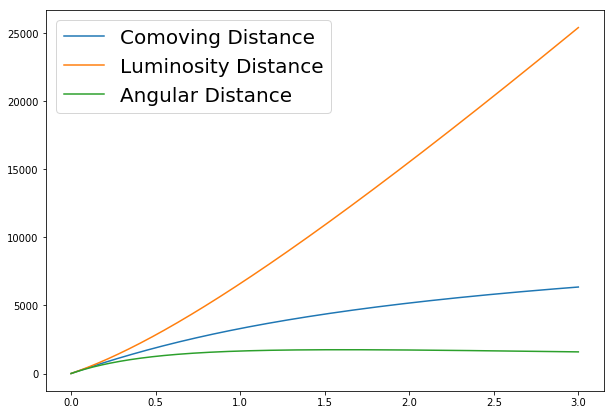

In [8]:
plt.figure(figsize = (10,7))
plt.plot(z, comoving_distance, label='Comoving Distance')
plt.plot(z, luminosity_distance, label='Luminosity Distance')
plt.plot(z, angular_distance, label='Angular Distance')
plt.legend(fontsize=20, loc=2)
plt.show()

## 5.2 Play with the data 

### 1. Using the notebook examples (using astro_query.sdss method), get the magnitudes in u,g,r,i and z band of SDSS for red galaxies. We want to get the spectroscopic redshift for these objects too. We will use a radius of 40 arcminutes in order to have enough galaxies.

In [9]:
from astroquery.sdss import SDSS      
from astropy import coordinates as coords
import astropy.units as u
from astropy.io import fits

/usr/lib/python2.7/dist-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [10]:
radius_multiplier = 40

pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
ixid = SDSS.query_region(pos, spectro=True, radius=radius_multiplier*u.arcmin)

print ixid

      ra           dec             objid        ... run2d  instrument
------------- ------------- ------------------- ... ------ ----------
2.61543404474 14.3566609234 1237656494577877153 ...     26       SDSS
1.96758878225  14.506869456 1237652942639267883 ...     26       SDSS
1.88090101861 14.4272693022 1237652942639202514 ...     26       SDSS
2.34617633607 15.4251473616 1237656496188424355 ...     26       SDSS
2.57613904632 14.5607852125 1237652942639530137 ...     26       SDSS
 2.3871120376 14.2896317514 1237656494577811639 ...     26       SDSS
2.29601179121 14.8514278668 1237652943176270432 ...     26       SDSS
2.28595064907 14.9497757494 1237652943176269974 ...     26       SDSS
1.82059653267 15.0479136938 1237656495651291838 ... v5_7_0       BOSS
1.61667063557 14.8153606931 1237652943176007712 ... v5_7_0       BOSS
          ...           ...                 ... ...    ...        ...
 1.7406930584 15.4305755335 1237656496188162169 ...     26       SDSS
2.04990225912 14.968

In [11]:
ph = SDSS.query_region(pos, spectro=True, radius=radius_multiplier*u.arcmin, \
                       photoobj_fields=['modelMag_u', 'modelMag_g','modelMag_r' ,'modelMag_i','modelMag_z', \
                                        'type', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', \
                                        'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i', \
                                        'modelMagErr_z'], specobj_fields=['z'])

print ph

modelMag_u modelMag_g modelMag_r ... modelMagErr_i modelMagErr_z       z      
---------- ---------- ---------- ... ------------- ------------- -------------
  24.92053   21.85964   20.10808 ...    0.02351972    0.05704097     0.5392353
  20.50941    18.4298   17.33093 ...    0.00613974    0.01292892     0.1048752
  22.11313   21.73485    20.3828 ...    0.03770972     0.1116193     0.6037718
  25.75285   22.31976   20.48898 ...    0.03480274    0.08557774     0.4878244
  25.26021   21.98537   20.07359 ...    0.03324484    0.07290085     0.5969329
  20.75724   18.76814   17.46248 ...   0.006127176    0.01420676     0.1820627
  18.42127   16.66845   15.83233 ...   0.004052795   0.008931578    0.01817357
  22.88829   21.93012   20.88378 ...    0.03750034     0.1222696     0.4867133
  22.04007   20.66966   18.90332 ...    0.02447117    0.06433067     0.3755107
  19.28471   18.00467   17.30871 ...    0.01234012    0.03886862     0.1165289
       ...        ...        ... ...           ...  

In [12]:
# Defining Variable Names for Photometric/Spect Data and Model Magnitudes

photo_u = ph[:]['modelMag_u']
photo_g = ph[:]['modelMag_g']
photo_r = ph[:]['modelMag_r']
photo_i = ph[:]['modelMag_i']
photo_z = ph[:]['modelMag_z']

error_u = ph[:]['modelMagErr_u']
error_g = ph[:]['modelMagErr_g']
error_r = ph[:]['modelMagErr_r']
error_i = ph[:]['modelMagErr_i']
error_z = ph[:]['modelMagErr_z']

psf_photo_u = ph[:]['psfMag_u']
psf_photo_g = ph[:]['psfMag_g']
psf_photo_r = ph[:]['psfMag_r']
psf_photo_i = ph[:]['psfMag_i']
psf_photo_z = ph[:]['psfMag_z']

spec_redshift = ph[:]['z']
type_object = ph[:]['type']

model_u, model_g, model_r, model_i, model_z, model_redshift = np.loadtxt('../couleurs_yjhbk_zf_80.dat', unpack=True)

color_gi = model_g - model_i
color_gr = model_g - model_r
color_gu = model_g - model_u
color_gz = model_g - model_z

error_color_gi = np.sqrt(error_g**2 + error_i**2)
error_color_gr = np.sqrt(error_g**2 + error_r**2)
error_color_gu = np.sqrt(error_g**2 + error_u**2)
error_color_gz = np.sqrt(error_g**2 + error_z**2)

In [13]:
# Discriminators

only_galaxies = np.where((spec_redshift <= 1.)&(type_object == 3))
only_galaxies = only_galaxies[0]

only_red_galaxies = np.where((type_object == 3)&(photo_g - photo_r > 0.5)&(spec_redshift <= 1.))
only_red_galaxies = only_red_galaxies[0]

only_good_redshift= np.where(model_redshift <= 1.)
only_good_redshift = only_good_redshift[0]

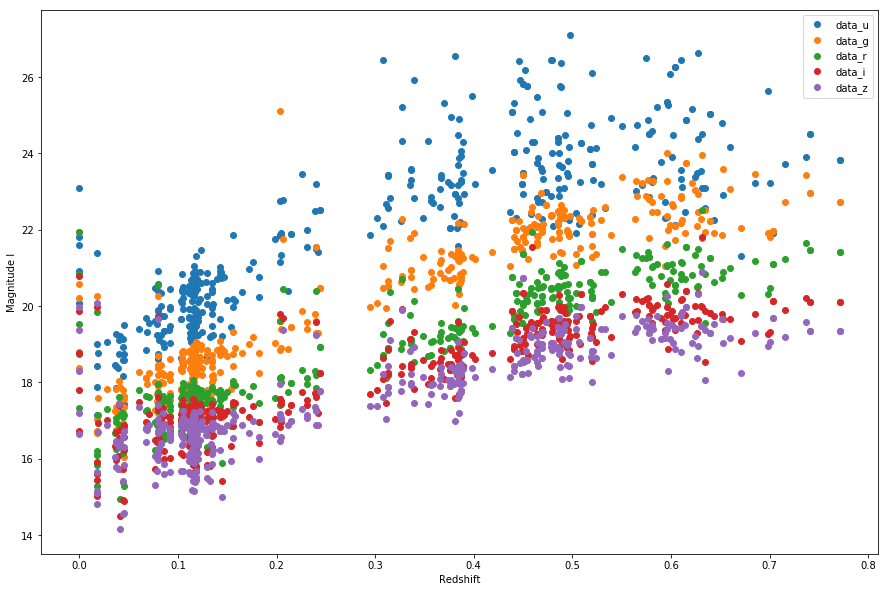

In [14]:
plt.figure(figsize=(15,10))
plt.plot(spec_redshift[only_galaxies], photo_u[only_galaxies], 'o', label='data_u')
plt.plot(spec_redshift[only_galaxies], photo_g[only_galaxies], 'o', label='data_g')
plt.plot(spec_redshift[only_galaxies], photo_r[only_galaxies], 'o', label='data_r')
plt.plot(spec_redshift[only_galaxies], photo_i[only_galaxies], 'o', label='data_i')
plt.plot(spec_redshift[only_galaxies], photo_z[only_galaxies], 'o', label='data_z')
plt.xlabel('Redshift') 
plt.ylabel('Magnitude I')
plt.legend()
plt.show()

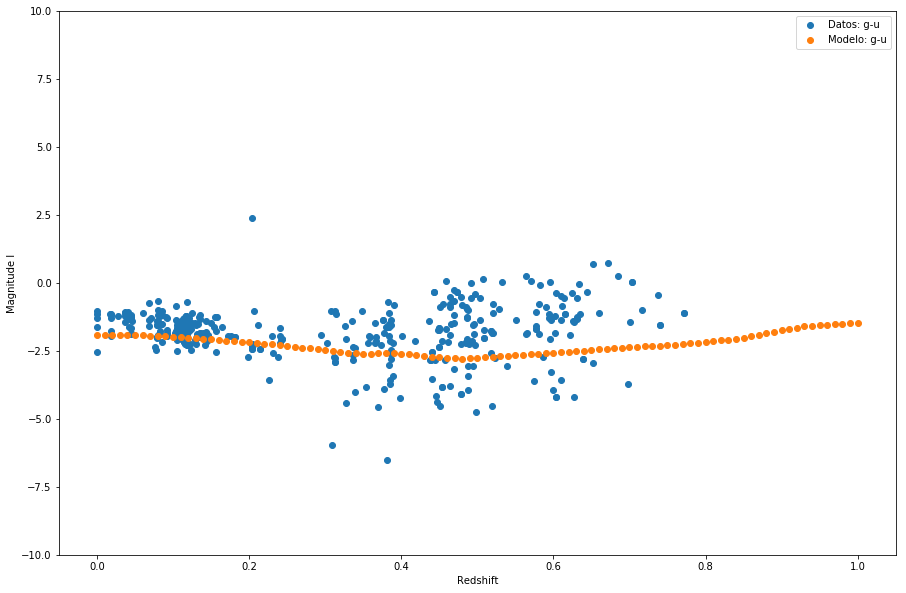

In [15]:
plt.figure(figsize=(15,10))
plt.plot(spec_redshift[only_galaxies], photo_g[only_galaxies] - photo_u[only_galaxies], 'o', label='Datos: g-u')
plt.plot(model_redshift[only_good_redshift], model_g[only_good_redshift] - model_u[only_good_redshift], 'o', label='Modelo: g-u')
plt.xlabel('Redshift')
plt.ylabel('Magnitude I')
plt.ylim(-10,10)
plt.legend()
plt.show()

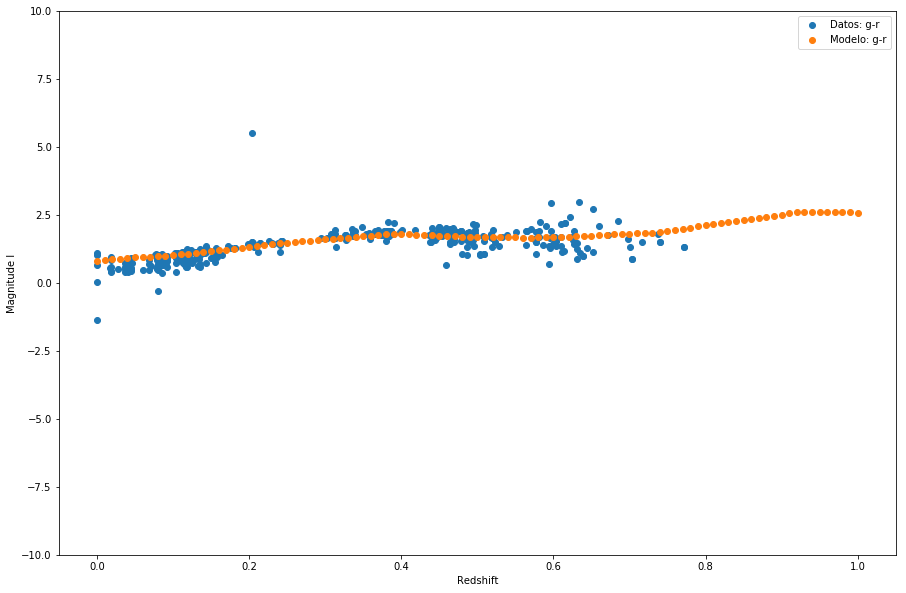

In [16]:
plt.figure(figsize=(15,10))
plt.plot(spec_redshift[only_galaxies], photo_g[only_galaxies] - photo_r[only_galaxies], 'o', label='Datos: g-r')
plt.plot(model_redshift[only_good_redshift], model_g[only_good_redshift] - model_r[only_good_redshift], 'o', label='Modelo: g-r')
plt.xlabel('Redshift')
plt.ylabel('Magnitude I')
plt.ylim(-10,10)
plt.legend()
plt.show()

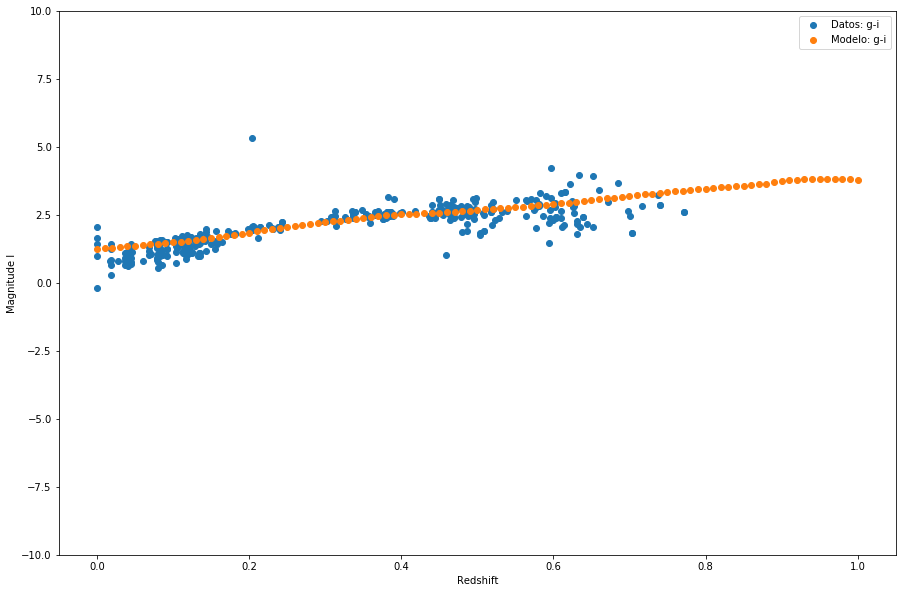

In [17]:
plt.figure(figsize=(15,10))
plt.plot(spec_redshift[only_galaxies], photo_g[only_galaxies] - photo_i[only_galaxies], 'o', label='Datos: g-i')
plt.plot(model_redshift[only_good_redshift], model_g[only_good_redshift] - model_i[only_good_redshift], 'o', label='Modelo: g-i')
plt.xlabel('Redshift')
plt.ylabel('Magnitude I')
plt.ylim(-10,10)
plt.legend()
plt.show()

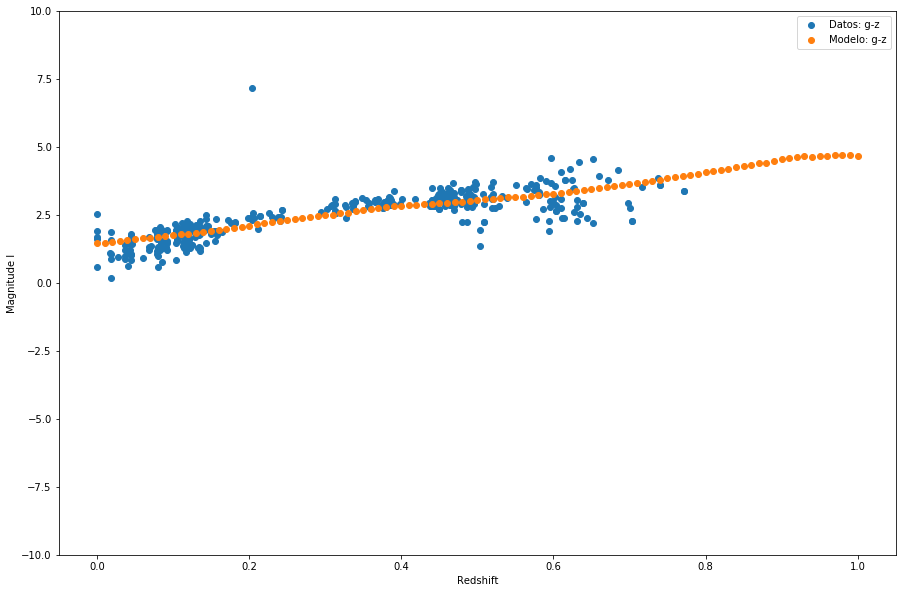

In [18]:
plt.figure(figsize=(15,10))
plt.plot(spec_redshift[only_galaxies], photo_g[only_galaxies] - photo_z[only_galaxies], 'o', label='Datos: g-z')
plt.plot(model_redshift[only_good_redshift], model_g[only_good_redshift] - model_z[only_good_redshift], 'o', label='Modelo: g-z')
plt.xlabel('Redshift')
plt.ylabel('Magnitude I')
plt.ylim(-10,10)
plt.legend()
plt.show()

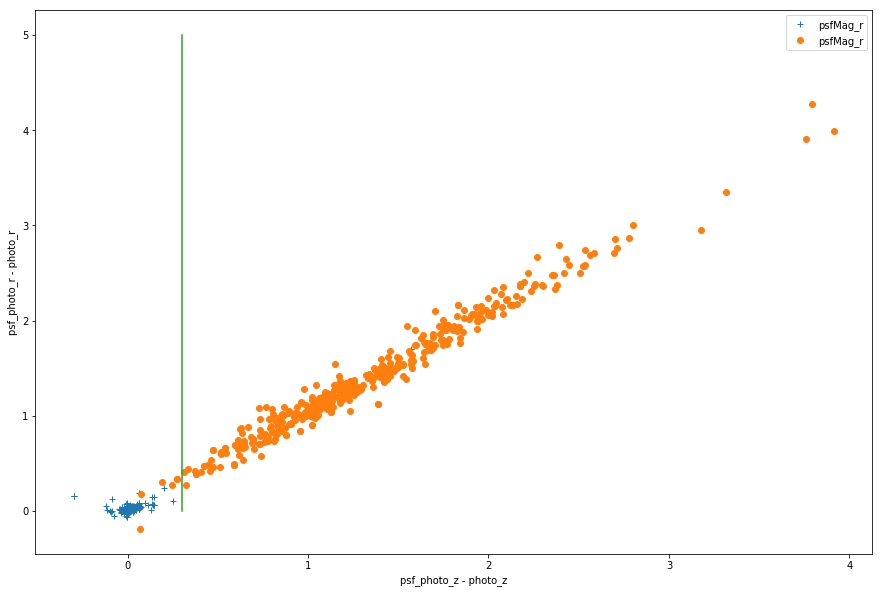

In [19]:
plt.figure(figsize=(15,10))
plt.plot(psf_photo_z - photo_z, psf_photo_r - photo_r ,'+') 
plt.plot(psf_photo_z[only_galaxies] - photo_z[only_galaxies], psf_photo_r[only_galaxies]- photo_r[only_galaxies] ,'o') 
plt.plot([0.3,0.3],[0,5])
plt.xlabel('psf_photo_z - photo_z')
plt.ylabel('psf_photo_r - photo_r')
plt.legend()
plt.show()

In [20]:
whatever = np.zeros(len(type_object))

In [21]:
for ii in range(len(model_redshift)):
    
    index = only_red_galaxies[ii]
    
    array_chi2 = 1./3 * (color_gu[only_good_redshift] - (photo_g[index] - photo_u[index]))**2 / error_color_gu[index]**2 \
                      + (color_gr[only_good_redshift] - (photo_g[index] - photo_r[index]))**2 / error_color_gr[index]**2 \
                      + (color_gi[only_good_redshift] - (photo_g[index] - photo_i[index]))**2 / error_color_gi[index]**2 \
                      + (color_gz[only_good_redshift] - (photo_g[index] - photo_z[index]))**2 / error_color_gz[index]**2
    
    smallest_chi2_index = np.argmin(array_chi2)
    
    whatever[index] = model_redshift[smallest_chi2_index]

In [22]:
len(array_chi2)

101

In [23]:
len(model_redshift)

311

In [24]:
len(whatever)

558

In [25]:
array_chi2

array([ 283.32396037,  272.72041023,  262.2074206 ,  250.12495279,
        238.87019701,  228.43165986,  217.72231809,  209.64083599,
        199.40471103,  190.15832939,  179.68358356,  170.61646629,
        160.13308453,  149.58969676,  140.2749639 ,  128.8678958 ,
        117.83992643,  106.85058318,   97.86575011,   87.78282742,
         79.12437188,   69.46513216,   60.21604528,   52.52496504,
         44.72691612,   39.34104163,   33.55094057,   28.53873008,
         25.18559921,   21.30600357,   17.73605746,   15.15931465,
         11.88966801,    9.63950977,    7.04967658,    4.99213201,
          3.90161148,    2.62543191,    1.86031165,    1.55191282,
          1.21867128,    0.98727191,    0.76609044,    0.59320925,
          0.46780133,    0.46056921,    0.40071029,    0.5898718 ,
          0.89385062,    1.14304192,    1.90461661,    2.96149736,
          3.58309745,    4.85071693,    6.06483606,    7.44675593,
          8.15250155,    9.87547272,   11.70928811,   13.86346

In [26]:
len(array_chi2)

101

In [27]:
len(model_redshift)

311

In [28]:
len(only_good_redshift)

101

In [29]:
len(photo_u)

558

In [30]:
len(error_color_gu)

558

### 2. Using the "idlsave" package, read the model magnitudes for $z_f = 0.7$ and $z_f = 0.5$ and plot the colors $g-u$, $g-r$, $g-i$, and $g-z$ for redshift between 0 and 1. 

### 3. Overplot the colors of the galaxies you get for the red galaxies for the 2 different models.